In [1]:
# pip install tensorflow_datasets

import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
print(tf.__version__)

2.5.0


In [3]:
import pathlib

data_dir = pathlib.Path('./image_data')

data_dir

PosixPath('image_data')

In [4]:
image_count = len(list(data_dir.glob('*.jpg')))
print(image_count)

9764


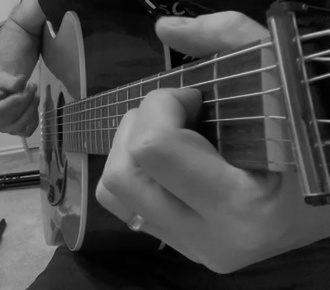

In [5]:
images = list(sorted(data_dir.glob('*')))

image = PIL.Image.open(str(images[0])).convert('L')

image_array = np.array(image)
image

In [6]:
batch_size = 32
img_width = 330
img_height = 290

In [7]:
import sqlite3

def get_labels():
    conn = sqlite3.connect('./labeler/labels.db')
    c = conn.cursor()
    c.execute("SELECT * FROM labels ORDER BY filename")
    rows = c.fetchall()
    conn.close()
    return rows

In [8]:
labels = get_labels()
labels

[('capo_0_shape_A_1_frame_00001.jpg', 'a', '0,0,2,2,2,0', 0, 0),
 ('capo_0_shape_A_1_frame_00002.jpg', 'a', '0,0,2,2,2,0', 0, 0),
 ('capo_0_shape_A_1_frame_00003.jpg', 'a', '0,0,2,2,2,0', 0, 0),
 ('capo_0_shape_A_1_frame_00004.jpg', 'a', '0,0,2,2,2,0', 0, 0),
 ('capo_0_shape_A_1_frame_00005.jpg', 'a', '0,0,2,2,2,0', 0, 0),
 ('capo_0_shape_A_1_frame_00006.jpg', 'a', '0,0,2,2,2,0', 0, 0),
 ('capo_0_shape_A_1_frame_00007.jpg', 'a', '0,0,2,2,2,0', 0, 0),
 ('capo_0_shape_A_1_frame_00008.jpg', 'a', '0,0,2,2,2,0', 0, 0),
 ('capo_0_shape_A_1_frame_00009.jpg', 'a', '0,0,2,2,2,0', 0, 0),
 ('capo_0_shape_A_1_frame_00010.jpg', 'a', '0,0,2,2,2,0', 0, 0),
 ('capo_0_shape_A_1_frame_00011.jpg', 'a', '0,0,2,2,2,0', 0, 0),
 ('capo_0_shape_A_1_frame_00012.jpg', 'a', '0,0,2,2,2,0', 0, 0),
 ('capo_0_shape_A_1_frame_00013.jpg', 'a', '0,0,2,2,2,0', 0, 0),
 ('capo_0_shape_A_1_frame_00014.jpg', 'a', '0,0,2,2,2,0', 0, 0),
 ('capo_0_shape_A_1_frame_00015.jpg', 'a', '0,0,2,2,2,0', 0, 0),
 ('capo_0_shape_A_1_frame

In [9]:
image_array

array([[170, 170, 170, ...,  17,  21,  21],
       [170, 170, 170, ...,  23,  21,  22],
       [170, 170, 170, ...,  19,  22,  22],
       ...,
       [138, 145, 146, ...,  25,  23,  23],
       [142, 145, 147, ...,  25,  24,  25],
       [144, 146, 147, ...,  24,  26,  27]], dtype=uint8)